# Conceptual

### 1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

(a) The sample size `n` is extremely large, and the number of predictors `p` is small.
- Better. In general, large dataset requires more flexible method to capture important patterns in the data

(b) The number of predictors `p` is extremely large, and the number of observations `n` is small.
- Worse. In highly dimensional spaces with little data, a flexible method is, in general, more likely to overfit and capture noise rather than the actual patterns

(c) The relationship between the predictors and response is highly non-linear.
- Better. In general, more flexible model will be able to pick up nonlinear patterns in data 

(d) The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high.
- Worse. High variance of the error term means that the training samples have lots of variability - flexible method will, in general, will fit to that noise (overfitting)

### 2. Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide `n` and `p`.
(a) We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.
- Regression (salary). Inference problem - understanding factors which affect salary. `n = 500, p = [profit, number of employees, industry]`

(b) We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20
similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.
- (Binary) Classification (success/failure). Prediction problem. `n = 20, p = [price charged for the product, marketing budget, competition price, ten other variables]`

(c) We are interested in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market
- Regression (% change). Prediction problem. `n = 52 (weeks in a year). p = [% change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market]`

### 3. We now revisit the bias-variance decomposition.
(a) Provide a sketch of typical (squared) bias, variance, training error, test error, and Bayes (or irreducible) error curves, on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. The x-axis should represent the amount of flexibility in the method, and the y-axis should represent the values for each curve. There should be five curves. Make sure to label each one.
(b) Explain why each of the five curves has the shape displayed in part (a)

In [82]:
import matplotlib.pyplot as plt
import numpy as np

In [107]:
flexibility = np.linspace(0, 10, 5)
irreducible_error = np.array([1] * 5)
training_error = np.array([5.5, 3.5, 1.5, 0, 0])
test_error = np.array([6, 4, 2, 3, 5])
bias_squared = np.array([5, 3, 1, 0.5, 0.5])
variance = [0, 0, 0.5, 0.5, 1.5]
mse = bayes_error + bias_squared + variance

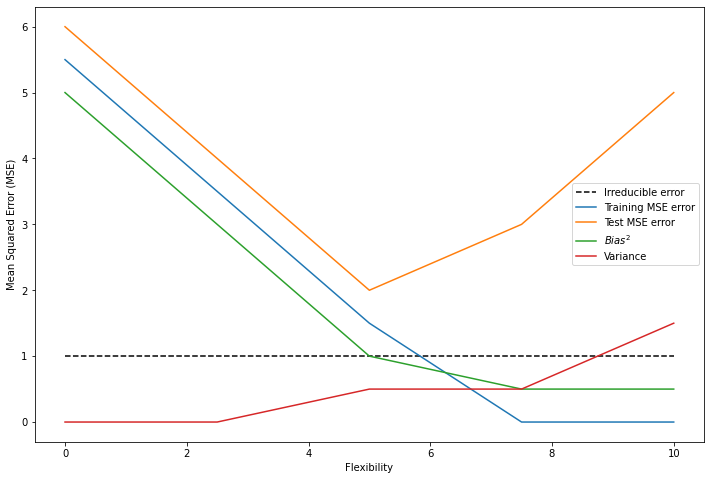

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(flexibility, irreducible_error, 'black', linestyle='--', label="Irreducible error")
ax.plot(flexibility, training_error, label="Training MSE error")
ax.plot(flexibility, test_error, label="Test MSE error")
ax.plot(flexibility, bias_squared, label=r"$Bias^2$")
ax.plot(flexibility, variance, label="Variance")
ax.set_xlabel("Flexibility")
ax.set_ylabel("Mean Squared Error (MSE)")
ax.legend()

(b) Explain why each of the five curves has the shape displayed in part (a).
- Irreducible error is a flat line representing a (constant) variance of the error term $Var(\epsilon)$
- Training MSE error is a (monotonically) decreasing function - more flexible models generally overfit to training data, making the training error drop to zero
- Test MSE error is a sum of bias (squared), variance and irreducible error: $E(MSE_{test}) = E(y_0 - \hat{f}(x_0)) = Var(\hat{f}(x_0)) + [Bias(\hat{f}(x_0))]^2 + Var(\epsilon)$. It initially drops as the flexibility increases (bias error drop is more significant than the increase in variance term) until the variance term starts becoming more significant than the bias term. Typically there exists a (local) minimum with flexibility that trades-off bias and variance.
- Bias decreases monotonically as more and more flexible models are less and less "off" when fitting the data
- Variance term is flat at first but then starts increasing significantly with model flexbility. This is becase more flexible models are susceptible to changes in training data (different samples of training data produce different models) - they start to "overfit" to noise.

### 4. You will now think of some real-life applications for statistical learning.
(a) Describe three real-life applications in which classification might be useful. Describe the response, as well as the predictors. Is the goal of each application 
inference or prediction? Explain your answer.
- Image classification. Response - set of labels (e.g. animals). Predictors - images ($h \times w \times d$) - height/width and depth ($d=3$ for a color image), respectively. Prediction task.
- Fraud detection. Response - fraud/not fraud. Predictors - POS (point of sale), amount, location, timestamp. Prediction task.
- Sentiment analysis. Response - postive/neutral/negative. Predictors - text (corpus), author, timestamp. Inference task - trying to understand the drivers behind content sentiment

(b) Describe three real-life applications in which regression might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.
- Stock price prediction. Response - stock price. Predictors - historical prices (time series). Prediction task.
- Average salary estimation. Reponse - average monthly salary. Predictors - demographics, credit card transactions. Inference task - trying to understand what factors affect affluence.
- Temperature prediction. Response - weekly temperature in a given city. Predictors - historical temperatures (time series). Prediction task.

(c) Describe three real-life applications in which cluster analysis might be useful.
- Customer segmentation - identifying customers with similar behaviour
- Gene expression segmentation - identifying groups of customers with similar gene expression patterns
- Sociology - grouping people with similar views/opinions


### 5. What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred?
- Less flexbile models are more likely to underfit (have high bias) and not be able to pick up complex relationships in data. More flexible models are more likely to overfit (have high variance) and can pick up noise as opposed to actual information within the data. This is applicable for both: regression and classification tasks. More flexible approach might be preferred whenever there is a lot of data and the data has complex (nonlinear) relationships (e.g. wiggly line in case of regression or nonlinear boundaries between classes in case of classification). Likewise, less flexible models are preferred when there is little data (or data is highly-dimensional) and/or relationships within data are "simple" (e.g. line in case of regression or linearly-separable classes in case of classification). Also, less flexible models are preferred in case of inference tasks (as they are, in general, more interpretable), whereas more flexible models are preferred in case of prediction tasks.

### 6. Describe the differences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classification (as opposed to a nonparametric approach)? What are its disadvantages?
- Parametric statistical learning approach requires assuming a structural form/shape of a function (e.g. a line or a polynomial), which is defined via a (finite) set of parameters, typically denoted $\Theta$ or $\beta$. Examples of parametric methods: Linear Regression (parameters are regression coefficients), Gaussian Mixture Model (parameters are mean and variance of gaussian mixtures). Non-parametric approach do not make this assumption - they do not require any parameters. Examples of non-parametric methods: K Nearest Neighbours (KNN), Gaussian Process, Kernel Density Estimation (KDE). Parametric methods are preferred when the assumptions about the model structure are likely correct (e.g. linear relationship) as finding optimal parameters is easier than fitting non-parametric models. In general, parametric methods will outperform non-parametric methods if there is a small number of samples per predictor as non-parametric methods require a large number of observations in order to provide a good estimate of the unknown function.


### 7. The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

In [111]:
import pandas as pd
from scipy.spatial import distance
df = pd.DataFrame({
    'x1': [0, 2, 0, 0, -1, 1],
    'x2': [3, 0, 1, 1, 0, 1],
    'x3': [0, 0, 3, 2, 1, 1],
    'y': ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']
})
df

,x1,x2,x3,y
0,0,3,0,Red
1,2,0,0,Red
2,0,1,3,Red
3,0,1,2,Green
4,-1,0,1,Green
5,1,1,1,Red


(a) Compute the Euclidean distance between each observation and the test point, $X_1 = X_2 = X_3 = 0$.

In [121]:
x_t = [0, 0, 0]
# Apply Euclidean distance function for each dataframe row (excluding last column - "y")
df.apply(lambda row: distance.euclidean(row.values[:-1], x_t), axis=1)

0    3.000000
1    2.000000
2    3.162278
3    2.236068
4    1.414214
5    1.732051
dtype: float64

(b) What is our prediction with K = 1? Why?
- $f(x_t) = Green$ - $x_4$ is the closest neighbour of $x_t$

(c) What is our prediction with K = 3? Why?
- $f(x_t) = Red$ - Two out of three closest neighbours of $x_t$ are 'Red'

(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?
- In case of highly nonlinear decision boundary we'd expect $K$ to be small as it has high flexibility (and small bias)

# Applied

In [131]:
import seaborn as sns

### 8. This exercise relates to the College data set, which can be found in the file College.csv. It contains a number of variables for 777 different universities and colleges in the US. 
(a), (b) Read and look at the data

In [125]:
college_df = pd.read_csv('../data/College.csv', index_col=0)
college_df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


(c)

i. Produce a numerical summary of the variables in the data set

In [126]:
college_df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


(c)

ii. Produce a scatterplot matrix of the first ten columns or variables of the data

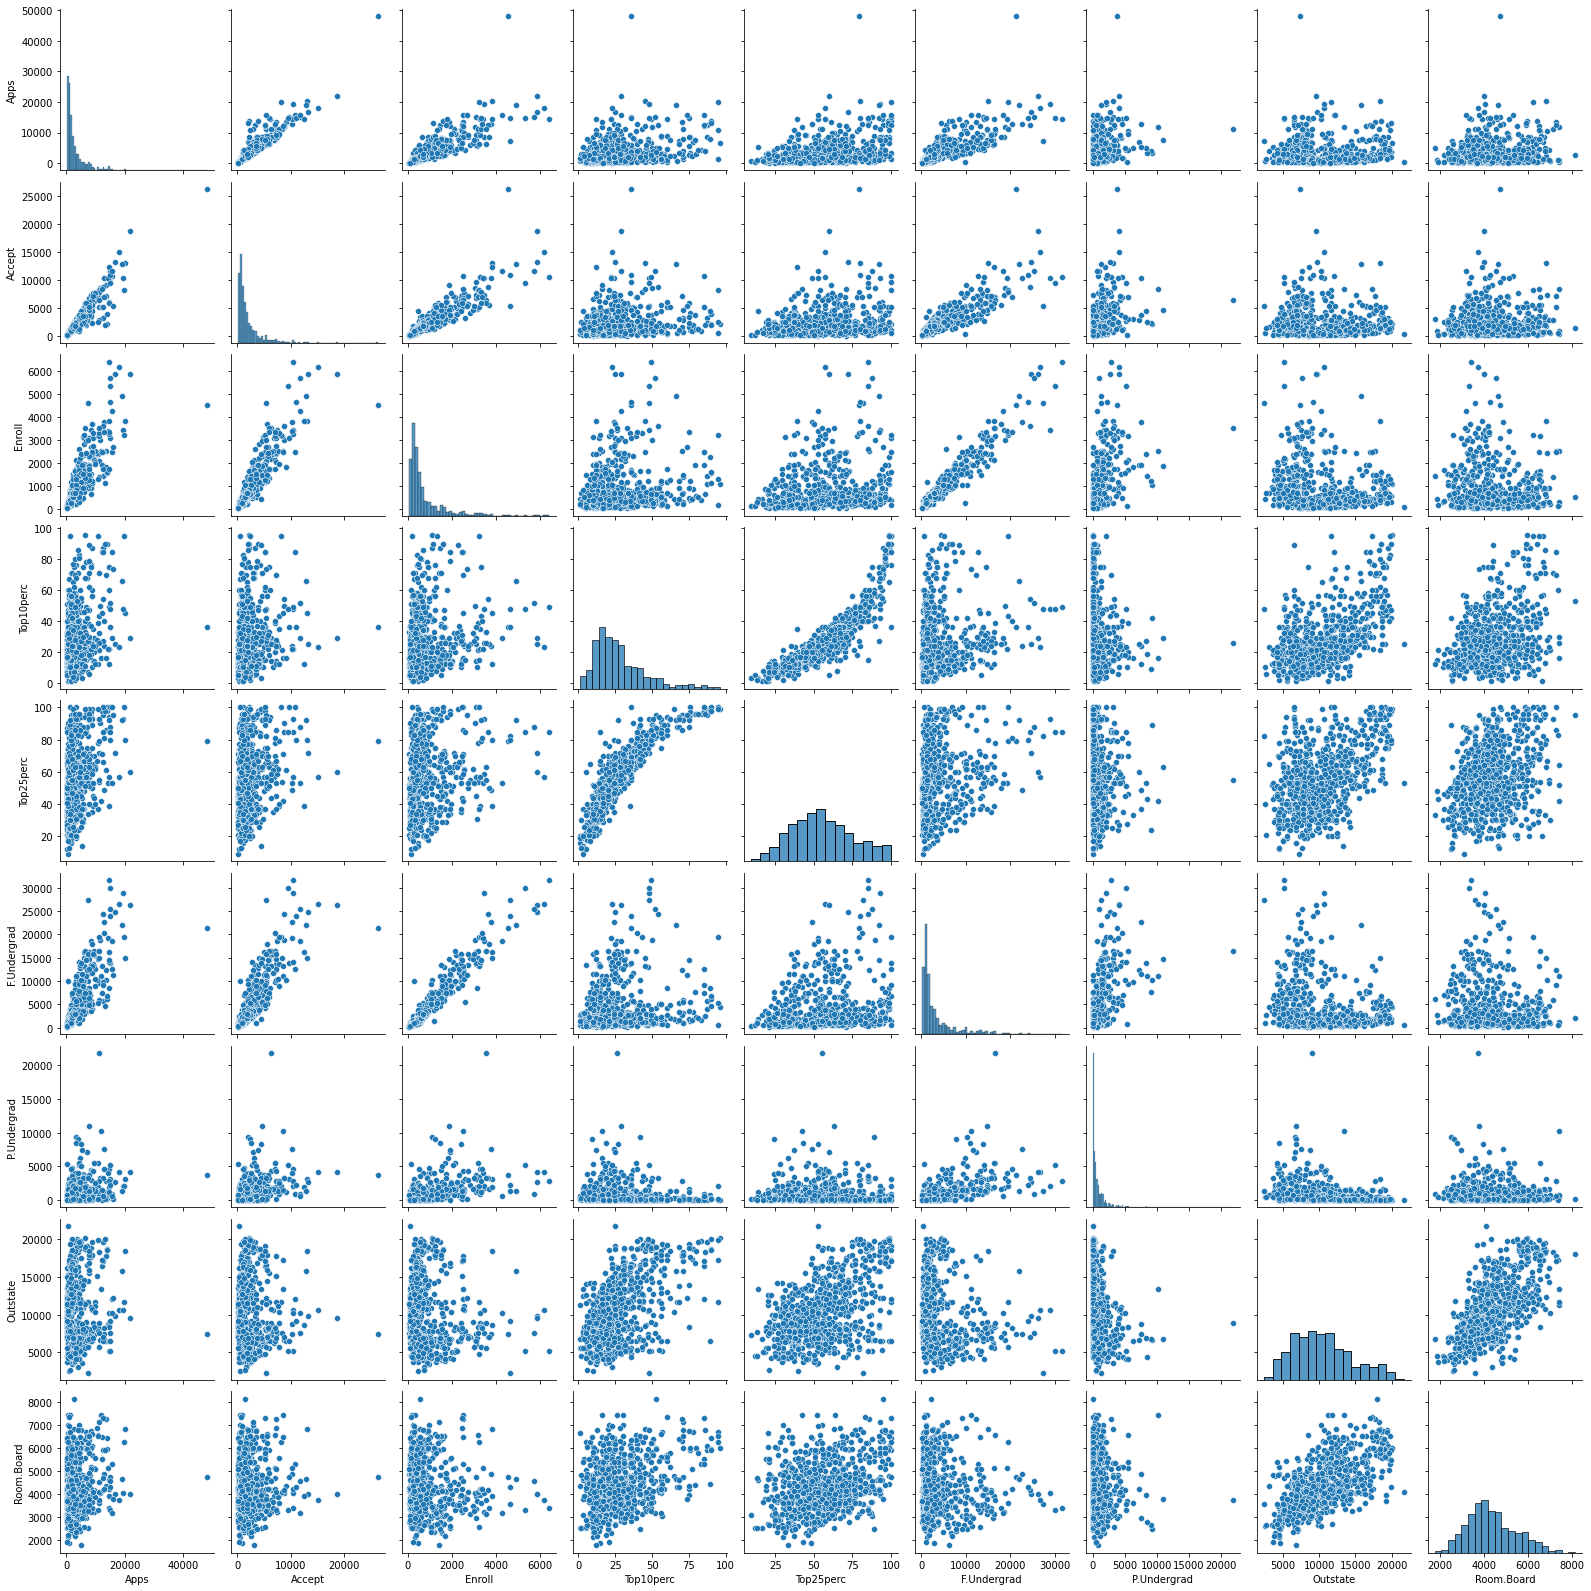

In [169]:
sns.pairplot(college_df.iloc[:, 1:10])

(c)

iii. Produce side-by-side boxplots of `Outstate` versus `Private`

<AxesSubplot:xlabel='Private', ylabel='Outstate'>

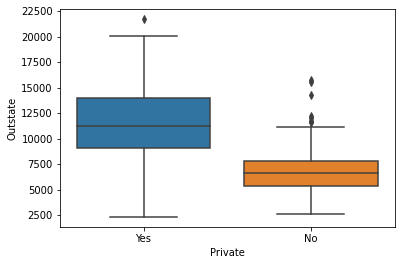

In [138]:
sns.boxplot(x=college_df.Private, y=college_df.Outstate)

(c)

iv. Create a new qualitative variable, called `Elite`, by binning the `Top10perc` variable. We are going to divide universities into two groups based on whether or not the proportion of students coming from the top 10 % of their high school classes exceeds 50%. See how many elite universities there are. Produce
side-by-side boxplots of `Outstate` versus `Elite`

Elite counts: 
False    699
True      78
Name: Elite, dtype: int64


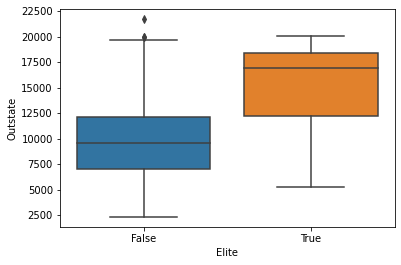

In [151]:
college_df["Elite"] = college_df.Top10perc > 50
sns.boxplot(x=college_df.Elite, y=college_df.Outstate)
print(f"Elite counts: \n{college_df.Elite.value_counts()}")

(c)

v. Produce some histograms with differing numbers of bins for a few of the quantitative variables

<AxesSubplot:xlabel='PhD', ylabel='Count'>

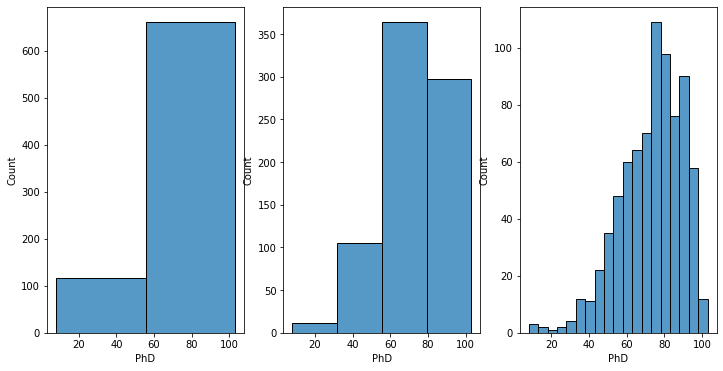

In [164]:
# Draw a histogram for `PhD` column for three distinct bin sizes (2, 4, default)
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
sns.histplot(college_df.PhD, bins=2, ax=axs[0])
sns.histplot(college_df.PhD, bins=4, ax=axs[1])
sns.histplot(college_df.PhD, ax=axs[2])

(c)

vi. Continue exploring the data, and provide a brief summary of what you discover.
- `Elite` and private universities have higher (out-of-state) tuition
- Graduation rate correlates (positively) with tuition
- `Top1Perc` is negatively correlated with the acceptance rate (defined below)

/Users/tomasz_bartkowiak/anaconda3/envs/data-science/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Acceptance rate', ylabel='Top10perc'>

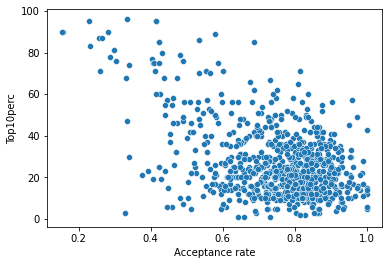

In [182]:
college_df["Acceptance rate"] =  college_df["Accept"] / college_df["Apps"]
sns.scatterplot(college_df["Acceptance rate"], college_df["Top10perc"])

### 9. This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data

In [211]:
auto_df = pd.read_csv("../data/Auto.csv").dropna()
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


(a) Which of the predictors are quantitative, and which are qualitative?
- Quantitative: _mpg, cylinders, displacement, horsepower, weight, acceleration, year_
- Qualitative: _origin (although encoded as an `int`), name_

(b) What is the range of each quantitative predictor?
(c) What is the mean and standard deviation of each quantitative predictor?

In [212]:
auto_df.describe().loc[["min", "max", "mean", "std"]].iloc[:, :-1]  # Take all columns but last (origin)

,mpg,cylinders,displacement,weight,acceleration,year
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005


(d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [228]:
auto_df.drop(auto_df.index[9:85]).describe().loc[["min", "max", "mean", "std"]].iloc[:, :-1]  # sample at idx=9 is 10th observation

,mpg,cylinders,displacement,weight,acceleration,year
min,11.000000,3.000000,68.000000,1649.000000,8.500000,70.000000
max,46.600000,8.000000,455.000000,4997.000000,24.800000,82.000000
mean,24.438629,5.370717,187.049844,2933.962617,15.723053,77.152648
std,7.908184,1.653486,99.635385,810.642938,2.680514,3.111230


(e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings
- `mpg` (miles per gallon) is negatively correlated with car weight (the more it weights the less fuel efficient it is) 
- The younger the car (`year`) the more efficient it is w.r.t. `mpg`

(see below)

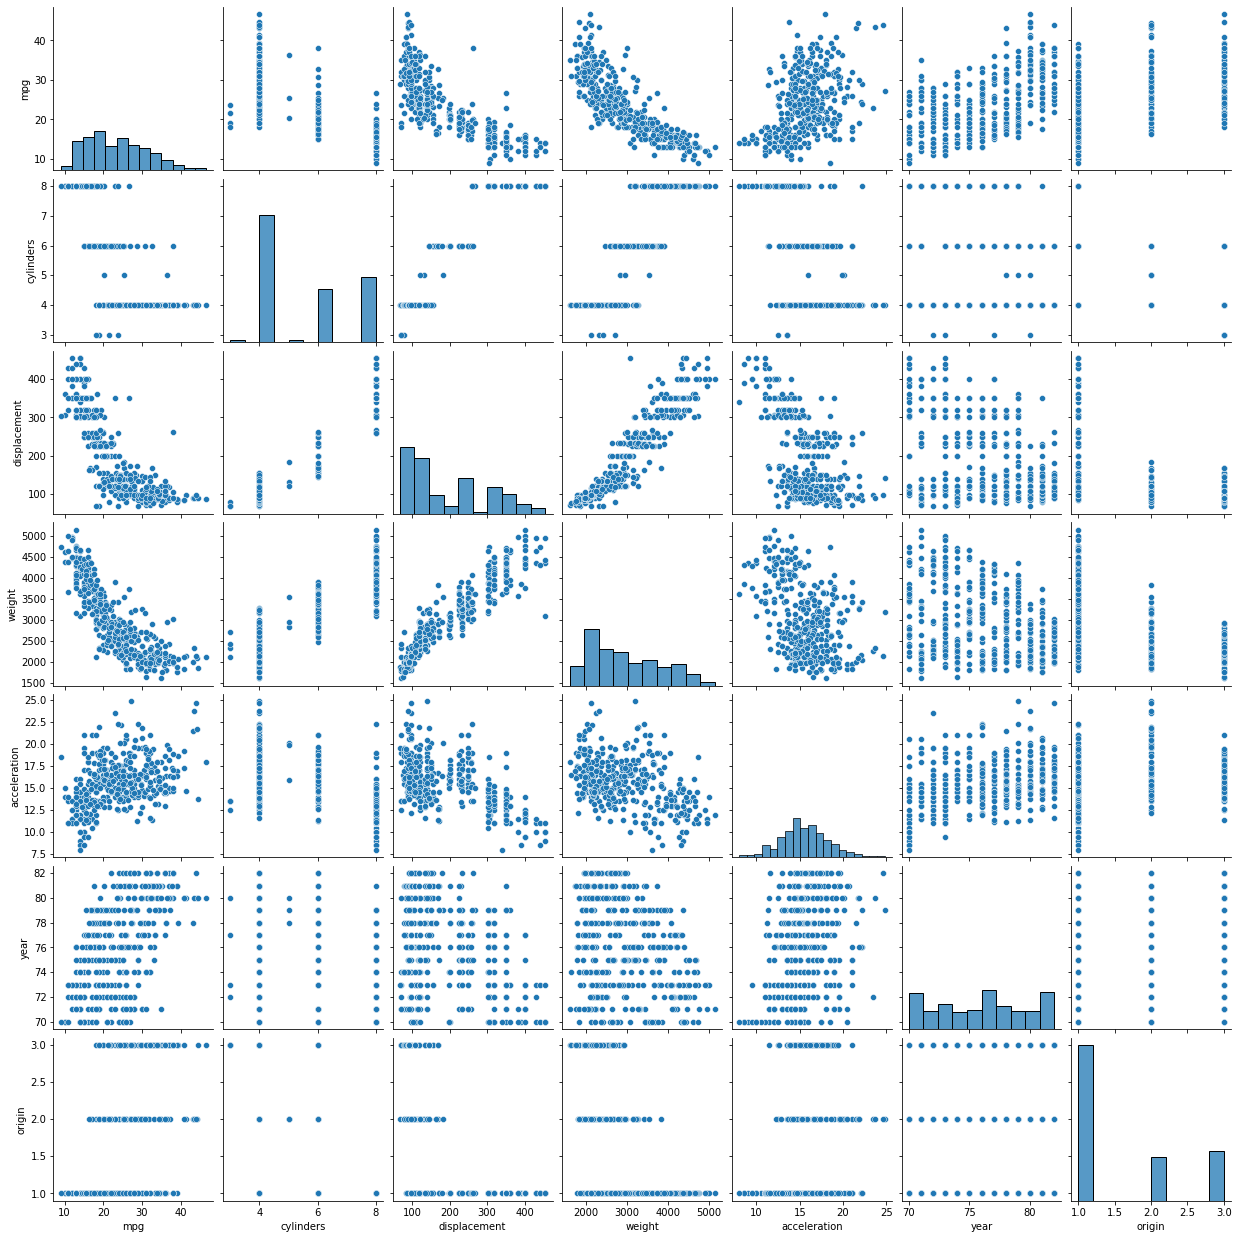

In [229]:
sns.pairplot(auto_df)

(f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? 
- _Displacement, weight, year_ indicate correlation with _mpg_ (by visual inspection) 

### 10. This exercise involves the Boston housing data set

(a) To begin, load in the Boston data set.

In [233]:
boston_df = pd.read_csv("../data/Boston.csv")
print("Dimensions of the dataset: ", boston_df.shape)
boston_df.head()

Dimensions of the dataset:  (506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


- CRIM - per capita crime rate by town 
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft. 
- INDUS - proportion of non-retail business acres per town 
- CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
- NOX - nitric oxides concentration (parts per 10 million) 
- RM - average number of rooms per dwelling 
- AGE - proportion of owner-occupied units built prior to 1940 
- DIS - weighted distances to five Boston employment centres 
- RAD - index of accessibility to radial highways 
- TAX - full-value property-tax rate per $10,000 
- PTRATIO pupil-teacher ratio by town 
- BLACK - proportion of blacks by town 
- LSTAT - lower status of the population 
- MEDV - Median value of owner-occupied homes in \$1000's

(b) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.
- _DIS_ is negatively correlated with _INDUS_ - the higher the proportion of non-retail business the distance to employment centres decreases
- _AGE_ is postiviely correlated with _NOX_ - the more owner-occupied units built prior to 1940, the higher the nitric oxides concentration
- _DIS_ is negatively correlated with _NOX_ - the closer the employment centres, the higher the concentration of nitric oxides

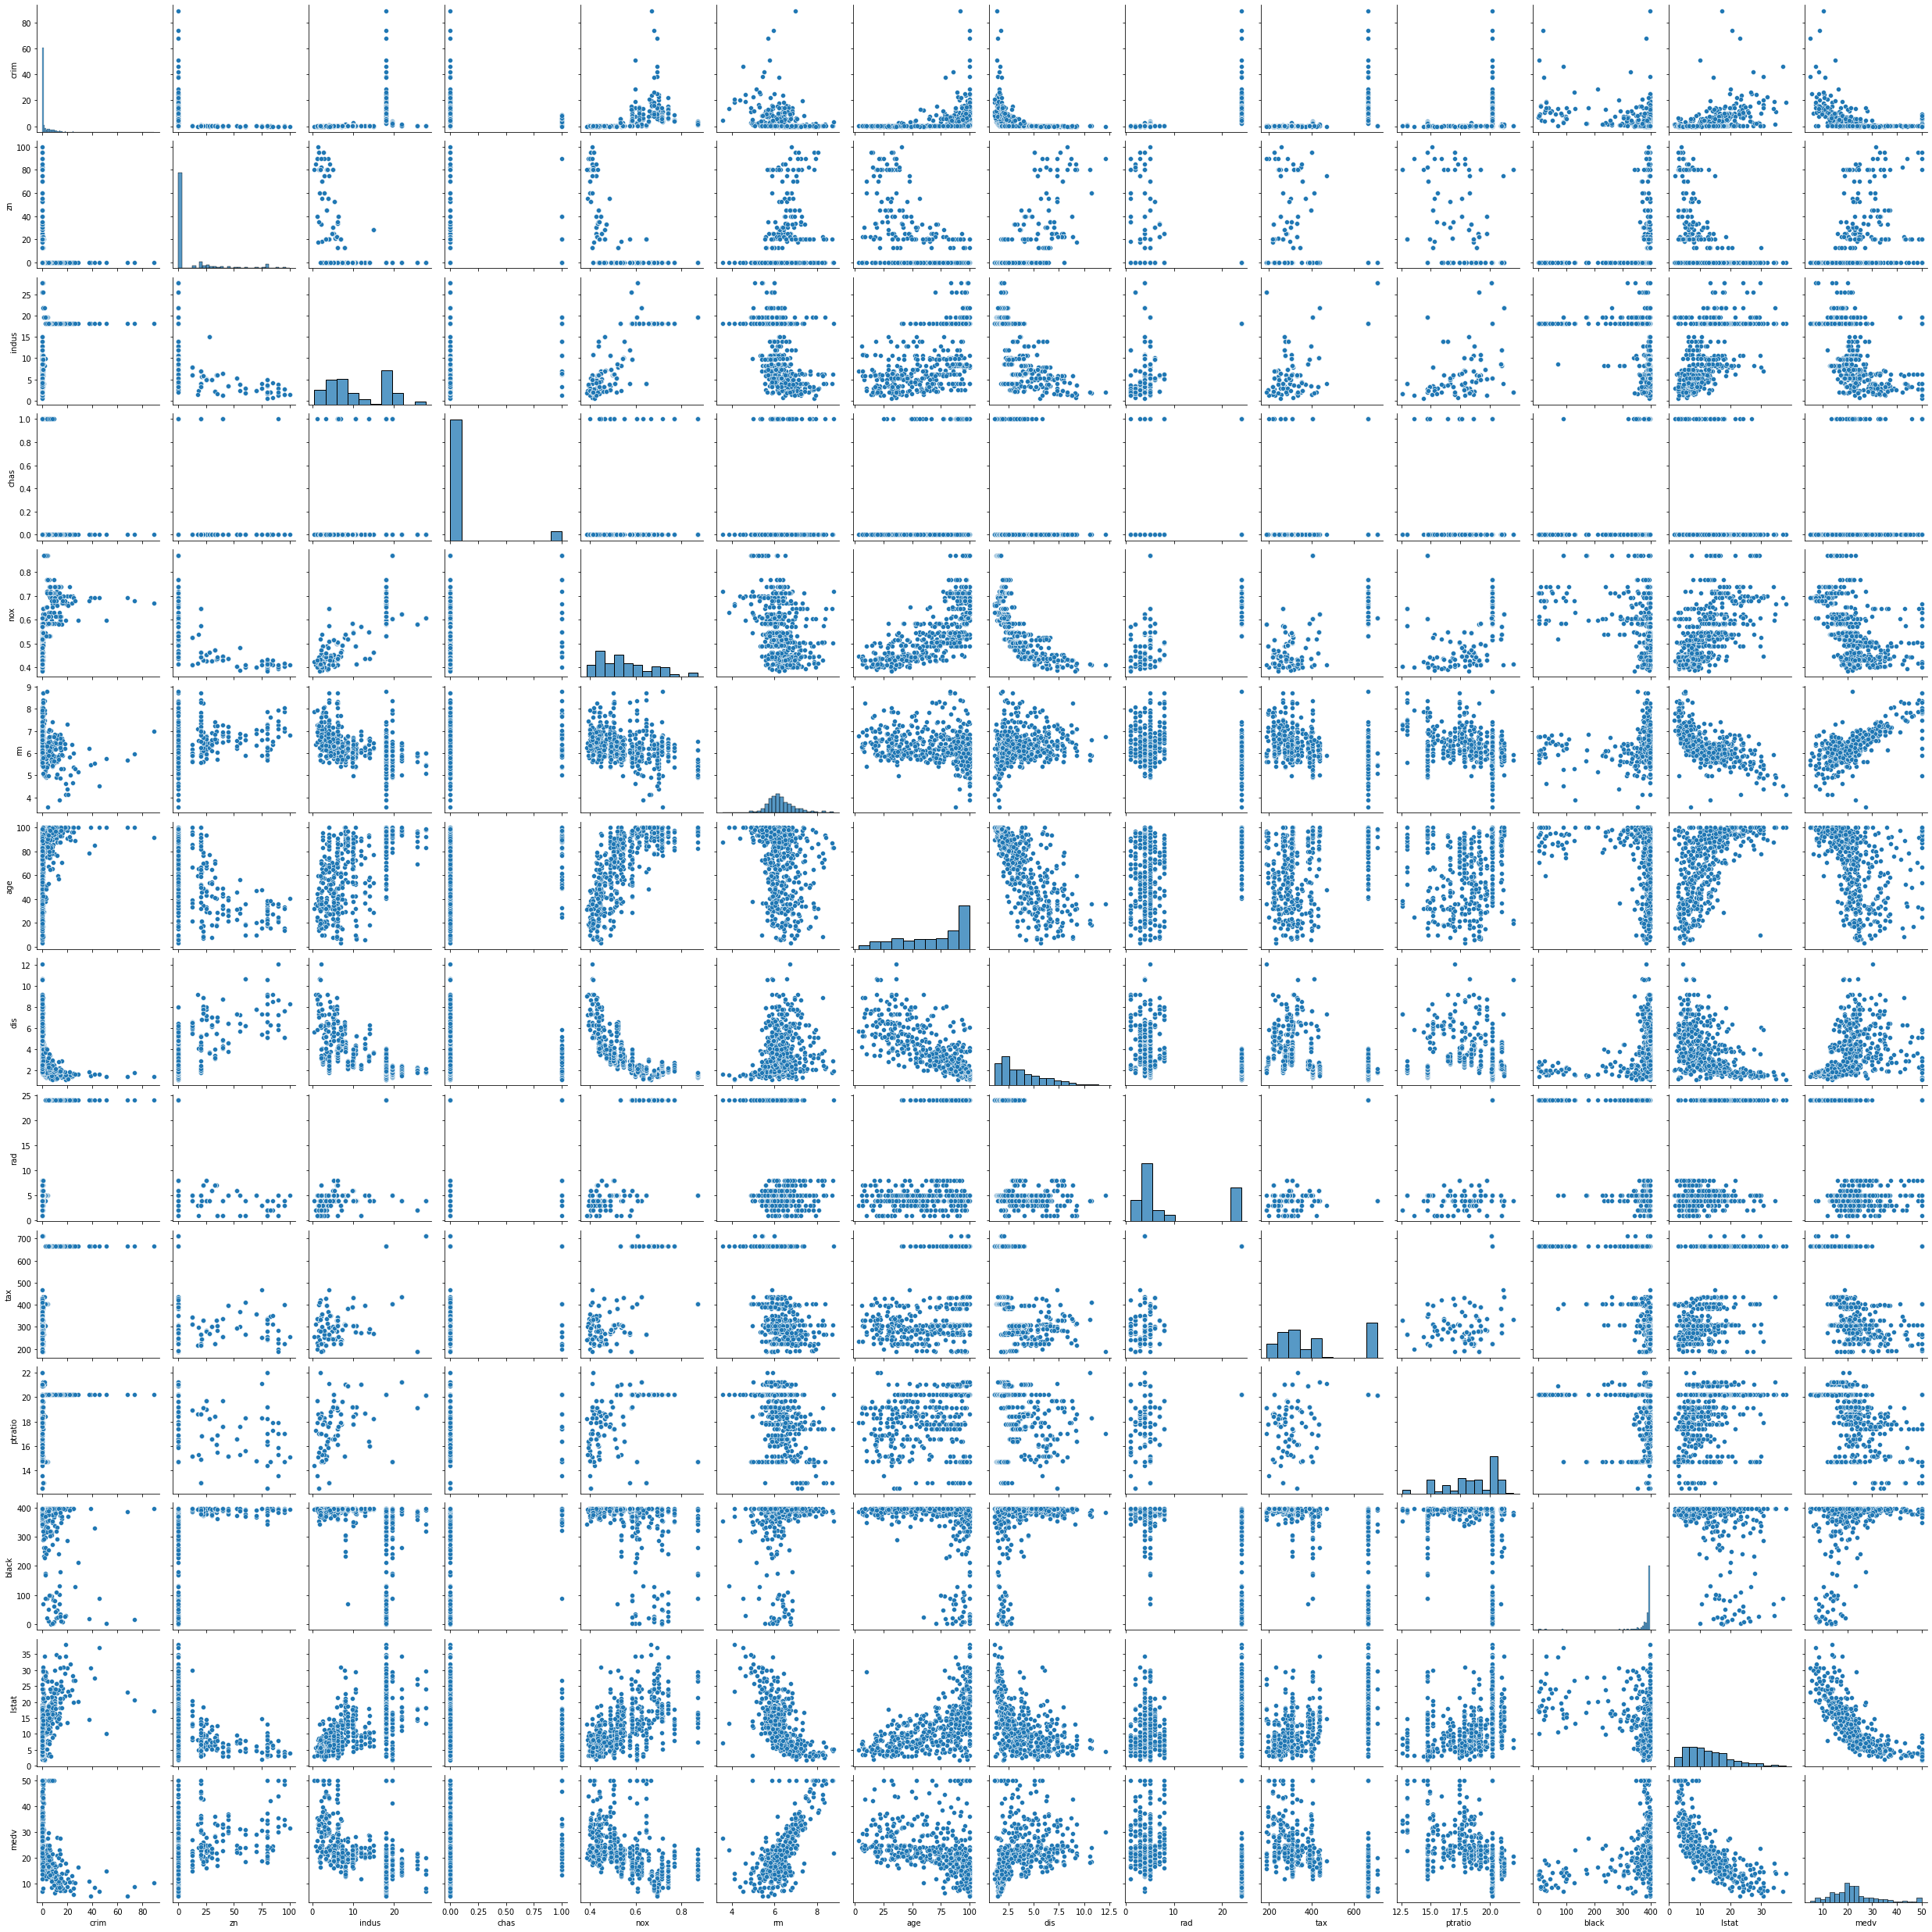

In [245]:
sns.pairplot(boston_df)

(c) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.
- _DIS_ (distances to five Boston employment centres) seems to be negatively correlated
- _LSTAT_ (lower status of the population) seems to be positively corelated

(see below)

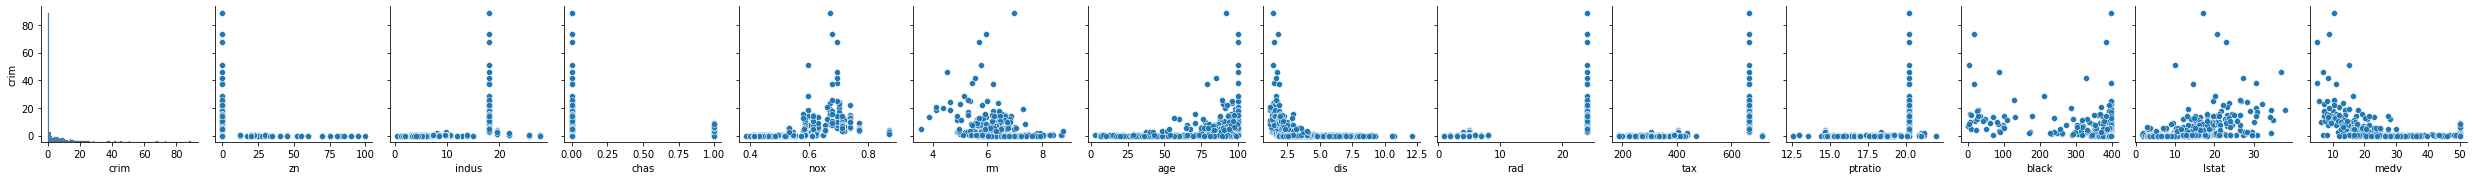

In [244]:
sns.pairplot(boston_df, y_vars=["crim"])

(d) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.
- Crime rate ranges btween 0.006 and ~89. There are 4 suburbs with crime rates > 50.
- (Property) Tax rates range between 187 and 711 per 10000$
- Pupil-teacher ratios range between 12.6 and 22

(e) How many of the suburbs in this data set bound the Charles river?
- 35 (see below)

In [259]:
boston_df[boston_df.chas == 1].shape

(35, 14)

(f) What is the median pupil-teacher ratio among the towns in this data set?

In [264]:
boston_df.ptratio.describe()["50%"]

19.05

(g) Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.
- Suburbs at indices 398, 405. They both have a value of owneroccupied homes - 5 (k$)

In [275]:
min_medv = boston_df.iloc[boston_df.medv.idxmin()].medv # Get min value of "medv"
boston_df[boston_df.medv == min_medv]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


(h) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling
 - 64 suburbs average more than 7 rooms per dwelling
 - 13 suburbs average more than 7 rooms per dwelling

Notes: 
- Crime rate for those suburbs is smaller (3.6 vs. 0.7) than average
- Lower status for those suburbs is smaller (4.3 vs. 12.6) than average

In [280]:
print("More than 7 rooms per dwelling:", boston_df[boston_df.rm > 7].shape[0])
print("More than 7 rooms per dwelling:", boston_df[boston_df.rm > 8].shape[0])

More than 7 rooms per dwelling: 64
More than 7 rooms per dwelling: 13
